In [1]:
import numpy as np
import matplotlib.pyplot as plt; plt.style.use('seaborn')
import pandas as pd
import yfinance as yf

In [2]:
def download(ticker, start=None, end=None):
    if start is None:
        return yf.Ticker(ticker).history(period="max")
    else:
        return yf.Ticker(ticker).history(start=start, end=end)

$$
\log x\approx x-1\quad\mbox{for $x\approx 1$}
$$

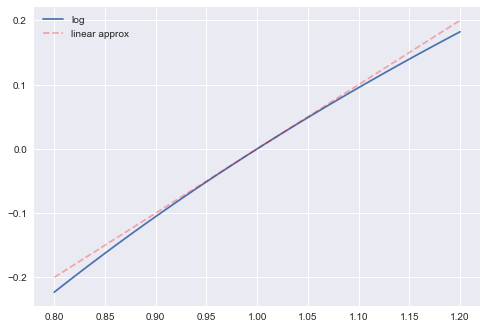

In [4]:
x = np.linspace(1-0.2,1+0.2,100)
y1 = np.log(x)
y2 = x - 1
plt.plot(x,y1,label='log')
plt.plot(x,y2,label='linear approx',alpha=0.3,linestyle='--',color='r')
plt.legend()
plt.show()

$$\begin{array}{cccccccc}
r_D&=&\frac{S_1}{S_0}-1\\
r_C&=&\log\frac{S_1}{S_0}&\approx&\frac{S_1}{S_0}-1&=&r_D\\
\end{array}$$

In [5]:
df = download('FB')
df['C_Return'] = np.log(df.Close / df.Close.shift(1))
df['D_Return'] = (df.Close / df.Close.shift(1)) - 1
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,C_Return,D_Return
Date,,,,,,,,,
2012-05-18,42.05,45.00,38.00,38.23,573576400,0,0,NaN,NaN
2012-05-21,36.53,36.66,33.00,34.03,168192700,0,0,-0.116378,-0.109861
2012-05-22,32.61,33.59,30.94,31.00,101786600,0,0,-0.093255,-0.089039
2012-05-23,31.37,32.50,31.36,32.00,73600000,0,0,0.031749,0.032258
2012-05-24,32.95,33.21,31.77,33.03,50237200,0,0,0.031680,0.032188
...,...,...,...,...,...,...,...,...,...
2020-12-30,277.95,278.08,271.71,271.87,11803800,0,0,-0.017899,-0.017740
2020-12-31,272.00,277.09,269.81,273.16,12892900,0,0,0.004734,0.004745
2021-01-04,274.78,275.00,265.20,268.94,15106100,0,0,-0.015569,-0.015449


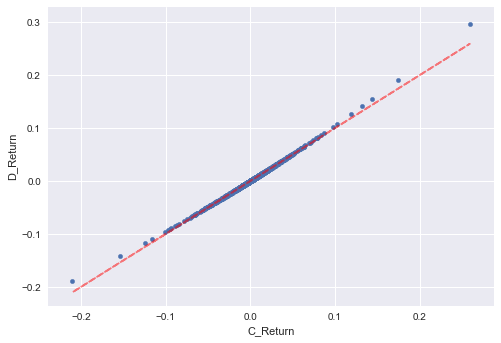

In [7]:
df[['C_Return','D_Return']].plot(kind='scatter',x='C_Return',y='D_Return')
plt.plot(df.C_Return, df.C_Return,'r--',alpha=0.5)
plt.show()